### Draft notebook: Comparison of concept vs. beta network structure

In [1]:
# load libraries
import os
os.environ["USE_PYGEOS"] = '0'
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from graphedit import *

# load network data
G_conc = spatialgraph_fromjson("../data/processed/workflow_steps/G_concept.json")
G_beta = spatialgraph_fromjson("../data/processed/workflow_steps/G_beta.json")

# "Stitch together" last component of G_conc
# nodes = get_node_gdf(G_conc)
# edges = get_edge_gdf(G_conc)
# edges.loc[edges["component_nr"]==1,"id"].values[0]
# nodes[nodes.distance(Point((679952.7287720959, 6129110.916196976))) < 15]
G_conc.add_edge((679952.7287720959, 6129110.916196976), (679967.5663359079, 6129110.908131809))

# get gdfs of edges and nodes
edges_conc = get_edge_gdf(G_conc)
edges_beta = get_edge_gdf(G_beta)
nodes_conc = get_node_gdf(G_conc)
nodes_beta = get_node_gdf(G_beta)

# metrics: length
len_conc = np.round(edges_conc.geometry.length.sum()/1000,2)
len_beta = np.round(edges_beta.geometry.length.sum()/1000,2)
# metrics: knudepunkter number
knr_conc = len(nodes_conc[nodes_conc["degree"]>1]) 
knr_beta = len(nodes_beta[nodes_beta["degree"]>1])
# metrics: knudepunkter density
den_conc = np.round(knr_conc / len_conc, 2)
den_beta = np.round(knr_beta / len_beta, 2)
# metrics: avg link length
avg_conc = np.round(1 / (knr_conc / len_conc), 2)
avg_beta = np.round(1 / (knr_beta / len_beta), 2)

# load septima data (point)
landemaerke = gpd.read_file("../data/processed/septima/land_landemaerke/land_landemaerke.gpkg")

# which of these POIs are within threshold of which network?
my_threshold = 250

li_beta = landemaerke[landemaerke.intersects(edges_beta.buffer(my_threshold).unary_union)].index
li_conc = landemaerke[landemaerke.intersects(edges_conc.buffer(my_threshold).unary_union)].index

# li_onlybeta = list(set(li_beta).difference(li_conc))
# li_onlyconc = list(set(li_conc).difference(li_beta))
# li_inboth = list(set(li_beta).intersection(li_conc))
# li_innone = list( set(landemaerke.index).difference(set(li_beta).union(set(li_conc))) )

# metrics: number of pois
pois_beta = len(li_beta)
pois_conc = len(li_conc)
# metrics: pois density
poiden_conc = np.round(pois_conc / len_conc, 2)
poiden_beta = np.round(pois_beta / len_beta, 2)

# compute average mesh size
def polygonize_with_nodes(gdf):
    ''' 
    input: geopandas.GeoDataFrame that contains a network of streets
    output: geopandas.GeoSeries that contains face polygons of street graph
    '''
    linestrings = gdf["geometry"]
    collection = shapely.GeometryCollection(linestrings.array)  # combine to a single object
    noded = shapely.node(collection)  # add missing nodes
    polygonized = shapely.polygonize(noded.geoms)  # polygonize based on an array of nodded parts
    polygon_series = gpd.GeoSeries(polygonized.geoms)  # create a GeoSeries from parts
    
    return(polygon_series)

poly_conc = polygonize_with_nodes(edges_conc)
mesh_conc = np.round(poly_conc.geometry.area.sum() / (10**6 * len(poly_conc)), 2)
poly_beta = polygonize_with_nodes(edges_beta)
mesh_beta = np.round(poly_beta.geometry.area.sum() / (10**6 * len(poly_beta)), 2)

print("Computations done")

/Users/anvy/opt/anaconda3/envs/knupu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computations done


Displaying computation results:


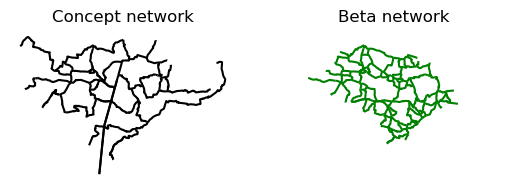

Length: 	 381.25km 			 354.79km
Knudepunkter: 	 71 				 149
Density (/km): 	 0.19 				 0.42
Avg link: 	 5.37km 			 2.38km
POIs (250m): 	 47 				 38
POI density/km:  0.12 				 0.11
Mesh size: 	 12.43km2 			 4.97km2


In [3]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)

i = 0
edges_conc.plot(ax=ax[i], color = "black")
ax[i].set_title("Concept network")
ax[i].set_axis_off()

i = 1
edges_beta.plot(ax=ax[i], color = "green")
ax[i].set_title("Beta network")
ax[i].set_axis_off()

print("Displaying computation results:")

plt.show()

print(f"Length: \t {len_conc}km \t\t\t {len_beta}km")
print(f"Knudepunkter: \t {knr_conc} \t\t\t\t {knr_beta}")
print(f"Density (/km): \t {den_conc} \t\t\t\t {den_beta}")
print(f"Avg link: \t {avg_conc}km \t\t\t {avg_beta}km")
print(f"POIs ({my_threshold}m): \t {pois_conc} \t\t\t\t {pois_beta}")
print(f"POI density/km:  {poiden_conc} \t\t\t\t {poiden_beta}")
print(f"Mesh size: \t {mesh_conc}km2 \t\t\t {mesh_beta}km2")

... etc.

***
## Question @ Kirsten: where do we want this?